<a href="https://colab.research.google.com/github/Echevarriaj93/Data_in_Motion_weeklies/blob/main/Copy_of_datainmotion_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data in Motion Week: Pandas Challenge week 6

# Challenge Questions

1.    Set PassengerId as the index.
2.    Create a pie chart presenting the male/female as proportions
3.    Create a scatterplot with the Fare payed and the Age, differ the plot color by gender
4.    How many people survived?
5.    Create a histogram with the Fare payed
6.    BONUS: Create your own question and answer it.

Link to Data: https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv


In [ ]:
#importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the data

data = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# 1. Set PassengerId as the index.

In [ ]:
df = data.set_index('PassengerId')

# 2. Create a pie chart presenting the male/female as proportions

(array([], dtype=float64), <a list of 0 Text major ticklabel objects>)

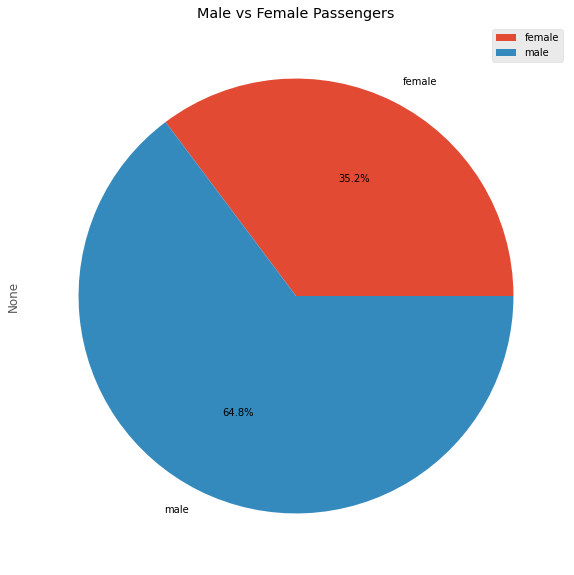

In [ ]:
df.groupby('Sex').size().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.style.use('ggplot')
plt.title('Male vs Female Passengers')
plt.legend()


# 3. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

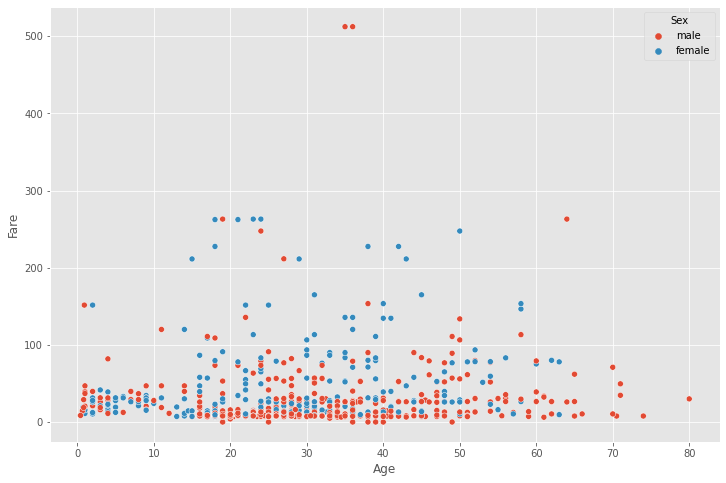

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex')


# 4. How many people survived?

In [ ]:
df['Survived'].value_counts()

In [ ]:
df['Survived'].sum()


342

### There were 342 survivors

# 5. Create a histogram with the Fare payed

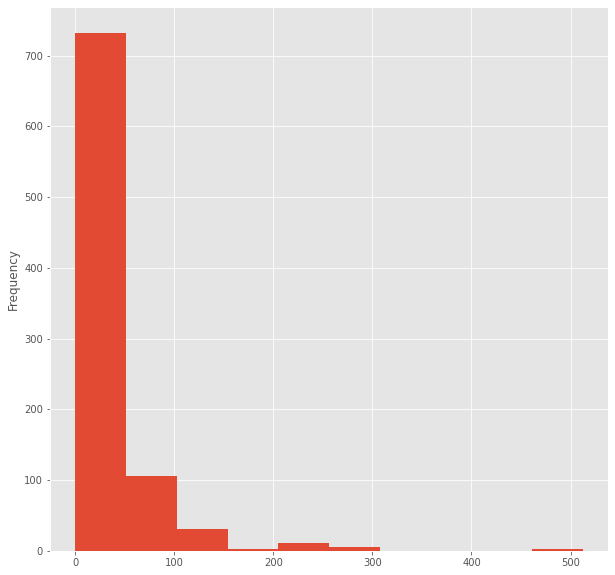

In [ ]:
df.Fare.plot(kind='hist', figsize=(10,10))

# 6. BONUS: Create your own question and answer it.

#Did Sex affect the fares paid?

In [ ]:
from scipy import stats

#Splitting the Data into two sets for each gender
male_df, female_df = df[df['Sex']== 'male'], df[df['Sex']== 'female']

male_df.shape, female_df.shape



((577, 11), (314, 11))

In [ ]:
#Take a sample and match the shape to female df for even comparison

male_sample = male_df.sample(n=314, random_state=42)

male_sample.shape #Now the shape matches the female df

(314, 11)

In [ ]:
male_fares = male_sample['Fare']
female_fares = female_df['Fare']

t2, p2 = stats.ttest_ind(female_fares, male_fares)

print("t = " + str(t2))

#if p < 0.05 we can reject the null hypothesis
print("p = " + str(p2)) #the null hyptohesis assumes paid classes make no difference



t = 4.8545680137252045
p = 1.5254492300424271e-06


### If we go off conventional standards of measurement the T Test provided a score exceeding 1.96 (positive or negative) and the P value is below .05 meaning that gender does in fact effect Fares significantly. We can see this reflected in the means as well.

In [ ]:
male_fares.mean(), female_fares.mean()

(25.015178980891722, 44.47981783439491)